<a href="https://colab.research.google.com/github/maybje/CE888/blob/master/lab7/Exercise_4_CNN_xrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "jemb90" # username from the json file
os.environ['KAGGLE_KEY'] = "9af8fc1dd77b773fe4e780fb265fcc40" # key from the json file
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:28<00:00, 21.6MB/s]
100% 2.29G/2.29G [00:28<00:00, 85.0MB/s]


In [0]:
# Upload data
from zipfile import ZipFile

file_name = "/content/chest-xray-pneumonia.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [0]:
data_dir_list = os.listdir('/content/chest_xray/val')
print(data_dir_list)

['PNEUMONIA', 'NORMAL']


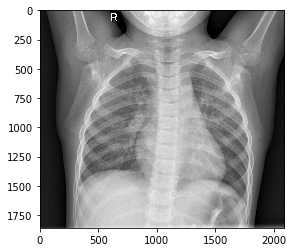

(1858, 2090, 3)


In [0]:
import cv2
import matplotlib.pyplot as plt
os.listdir('/content/chest_xray/train/PNEUMONIA')
im=cv2.imread('/content/chest_xray/train/NORMAL/IM-0115-0001.jpeg')
plt.imshow(im)
plt.show()
print(im.shape)


In [0]:
train_dir = '/content/chest_xray/train'
validation_dir = '/content/chest_xray/val'
test_dir = '/content/chest_xray/test'

train_pneumo = os.path.join(train_dir, 'PNEUMONIA')
train_norm = os.path.join(train_dir, 'NORMAL')

validation_pneumo = os.path.join(validation_dir, 'PNEUMONIA')
validation_norm = os.path.join(validation_dir, 'NORMAL')

test_pneumo = os.path.join(test_dir, 'PNEUMONIA')
test_norm = os.path.join(test_dir, 'NORMAL')

In [0]:
print('total training pneumo images:', len(os.listdir(train_pneumo)))
print('total training normal images:', len(os.listdir(train_norm)))
print('total validation pneumo images:', len(os.listdir(validation_pneumo)))
print('total validation normal images:', len(os.listdir(validation_norm)))
print('total test pneumo images:', len(os.listdir(test_pneumo)))
print('total test normal images:', len(os.listdir(test_norm)))

total training pneumo images: 3875
total training normal images: 1341
total validation pneumo images: 8
total validation normal images: 8
total test pneumo images: 390
total test normal images: 234


In [0]:
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 128)      

In [0]:
model.compile(loss='binary_crossentropy', 
              optimizer='Adam',
              metrics=['acc'])

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.05,
                                   height_shift_range=0.05,
                                   zoom_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(256, 256),
                                                        batch_size=32,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50, verbose=1)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 92s 921ms/step - loss: 0.4865 - acc: 0.7903 - val_loss: 0.5198 - val_acc: 0.6875
Epoch 2/20
100/100 [==============================] - 84s 843ms/step - loss: 0.2865 - acc: 0.8822 - val_loss: 0.4037 - val_acc: 0.8750
Epoch 3/20
100/100 [==============================] - 86s 855ms/step - loss: 0.2403 - acc: 0.9025 - val_loss: 0.2888 - val_acc: 0.8750
Epoch 4/20
100/100 [==============================] - 82s 822ms/step - loss: 0.2095 - acc: 0.9188 - val_loss: 0.6724 - val_acc: 0.6875
Epoch 5/20
100/100 [==============================] - 80s 805ms/step - loss: 0.2302 - acc: 0.9072 - val_loss: 0.3574 - val_acc: 0.8750
Epoch 6/20
100/100 [==============================] - 82s 820ms/step - loss: 0.1799 - acc: 0.9225 - val_loss: 0.3860 - val_acc: 0.8125
Epoch 7/20
100/100 [==============================] - 86s 859ms/step - loss: 0.1769 - acc: 0.9266 - val_loss

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                        target_size=(256, 256),
                                                        batch_size=32,
                                                        class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator)
test_acc

Found 624 images belonging to 2 classes.
20/20 [==============================] - 6s 311ms/step


0.9342948717948718

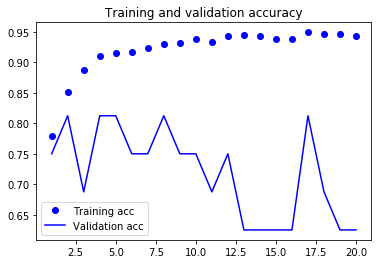

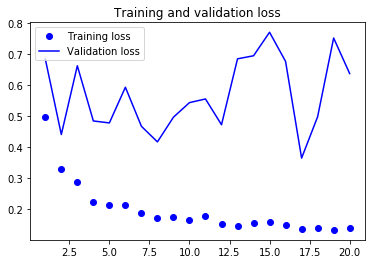

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Different Model

### Second last activation function from *relu* to *sigmoid*

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', 
              optimizer='Adam',
              metrics=['acc'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 128)      

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.05,
                                   height_shift_range=0.05,
                                   zoom_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(256, 256),
                                                        batch_size=16,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50, verbose=1)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.



Epoch 1/20





100/100 [==============================] - 93s 932ms/step - loss: 0.4538 - acc: 0.8012 - val_loss: 0.6006 - val_acc: 0.7500
Epoch 2/20
100/100 [==============================] - 75s 747ms/step - loss: 0.2713 - acc: 0.8881 - val_loss: 0.2856 - val_acc: 0.8125
Epoch 3/20
100/100 [==============================] - 74s 740ms/step - loss: 0.2553 - acc: 0.8962 - val_loss: 0.4110 - val_acc: 0.8750
Epoch 4/20
100/100 [==============================] - 74s 743ms/step - loss: 0.1881 - acc: 0.9216 - val_loss: 0.4186 - val_acc: 0.8750
Epoch 5/20
100/100 [==============================] - 74s 745ms/step - loss: 0.2001 - acc: 0.9181 - val_loss: 0.2812 - val_acc: 0.8125
Epoch 6/20
100/100 [==============================] - 74s 744ms/step - loss: 0.1880 - acc: 0.9284 - val_loss: 0.2872 - val_acc: 0.9375
Epoch 7/20
100/100 [==============================] - 74s 745ms/step - loss: 0.1619 - acc: 0.9387 - 

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                        target_size=(256, 256),
                                                        batch_size=32,
                                                        class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator)
test_acc

Found 624 images belonging to 2 classes.
20/20 [==============================] - 5s 269ms/step


0.9262820512820513

Similar Test Accuracy

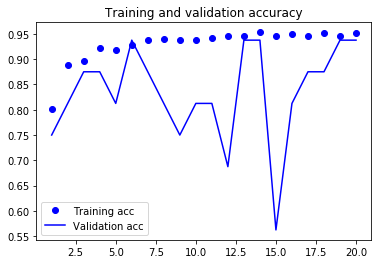

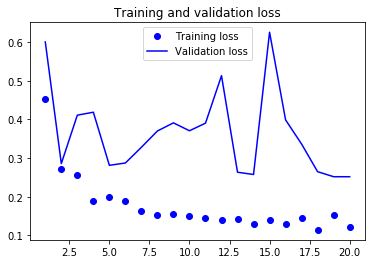

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()